<a href="https://colab.research.google.com/github/AnanyaSharma2/MachineLearning/blob/main/SVM/SupportVectorClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

Loading the data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

**Extracting the feature names**

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

# **Converting the data into Data Frame**

In [7]:
df = pd.DataFrame(iris.data,columns = iris.feature_names)

In [8]:
df['Target']= iris.target

In [9]:
df['Flower_name'] = df['Target'].apply(lambda x: iris.target_names[x])

In [10]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Flower_name
55,5.7,2.8,4.5,1.3,1,versicolor
57,4.9,2.4,3.3,1.0,1,versicolor
19,5.1,3.8,1.5,0.3,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa


In [11]:
df_setosa = df[df.Target ==0]

In [12]:
df_versicolor = df[df.Target ==1]

In [13]:
df_virginica = df[df.Target ==2]

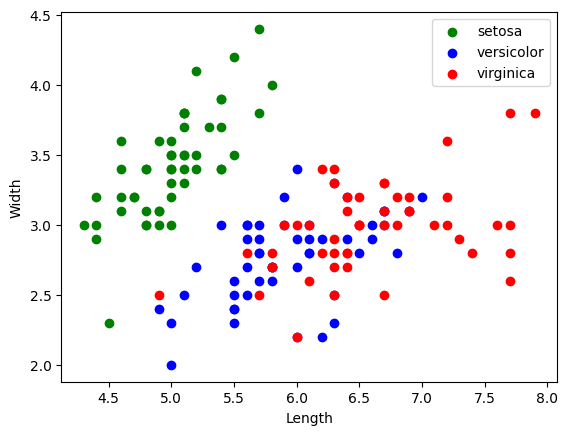

In [16]:
plt.scatter(df_setosa['sepal length (cm)'],df_setosa['sepal width (cm)'],color ='green',label='setosa')
plt.scatter(df_versicolor['sepal length (cm)'],df_versicolor['sepal width (cm)'],color ='blue',label='versicolor')
plt.scatter(df_virginica ['sepal length (cm)'],df_virginica ['sepal width (cm)'],color ='red',label='virginica')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

In [17]:
x = df.drop(['Target','Flower_name'],axis =1)

In [18]:
y= df.Target

# **Splitting the data**

In [19]:
X_train,X_test,y_train,y_test =  train_test_split(x,y,test_size=0.2)

In [20]:
model = SVC(C =10,kernel ='rbf')

In [21]:
model.fit(X_train,y_train)

SVC(C=10)

In [22]:
model.score(X_test,y_test)

0.9666666666666667

In [23]:
result = model.predict(X_test)

In [24]:
cn = confusion_matrix(y_test,result)

Text(50.722222222222214, 0.5, 'Truth')

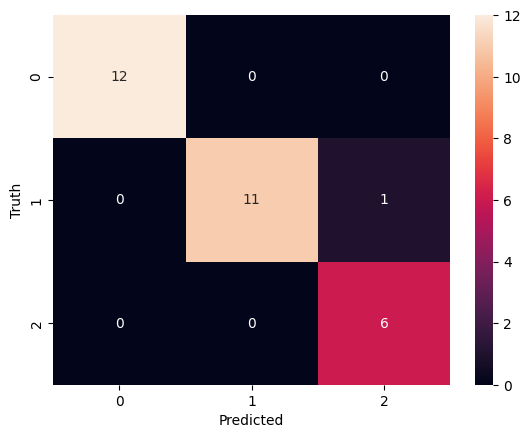

In [25]:
sns.heatmap(cn,annot =True)
plt.xlabel('Predicted')
plt.ylabel('Truth')